#                                                           TECHNO HACKS
#  Task -1 House Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


#Data Exploration

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/project files/kc_house_data.csv")
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

Drop Id column

In [ ]:
data.drop('id', axis=1, inplace=True)


# Data Analysis

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

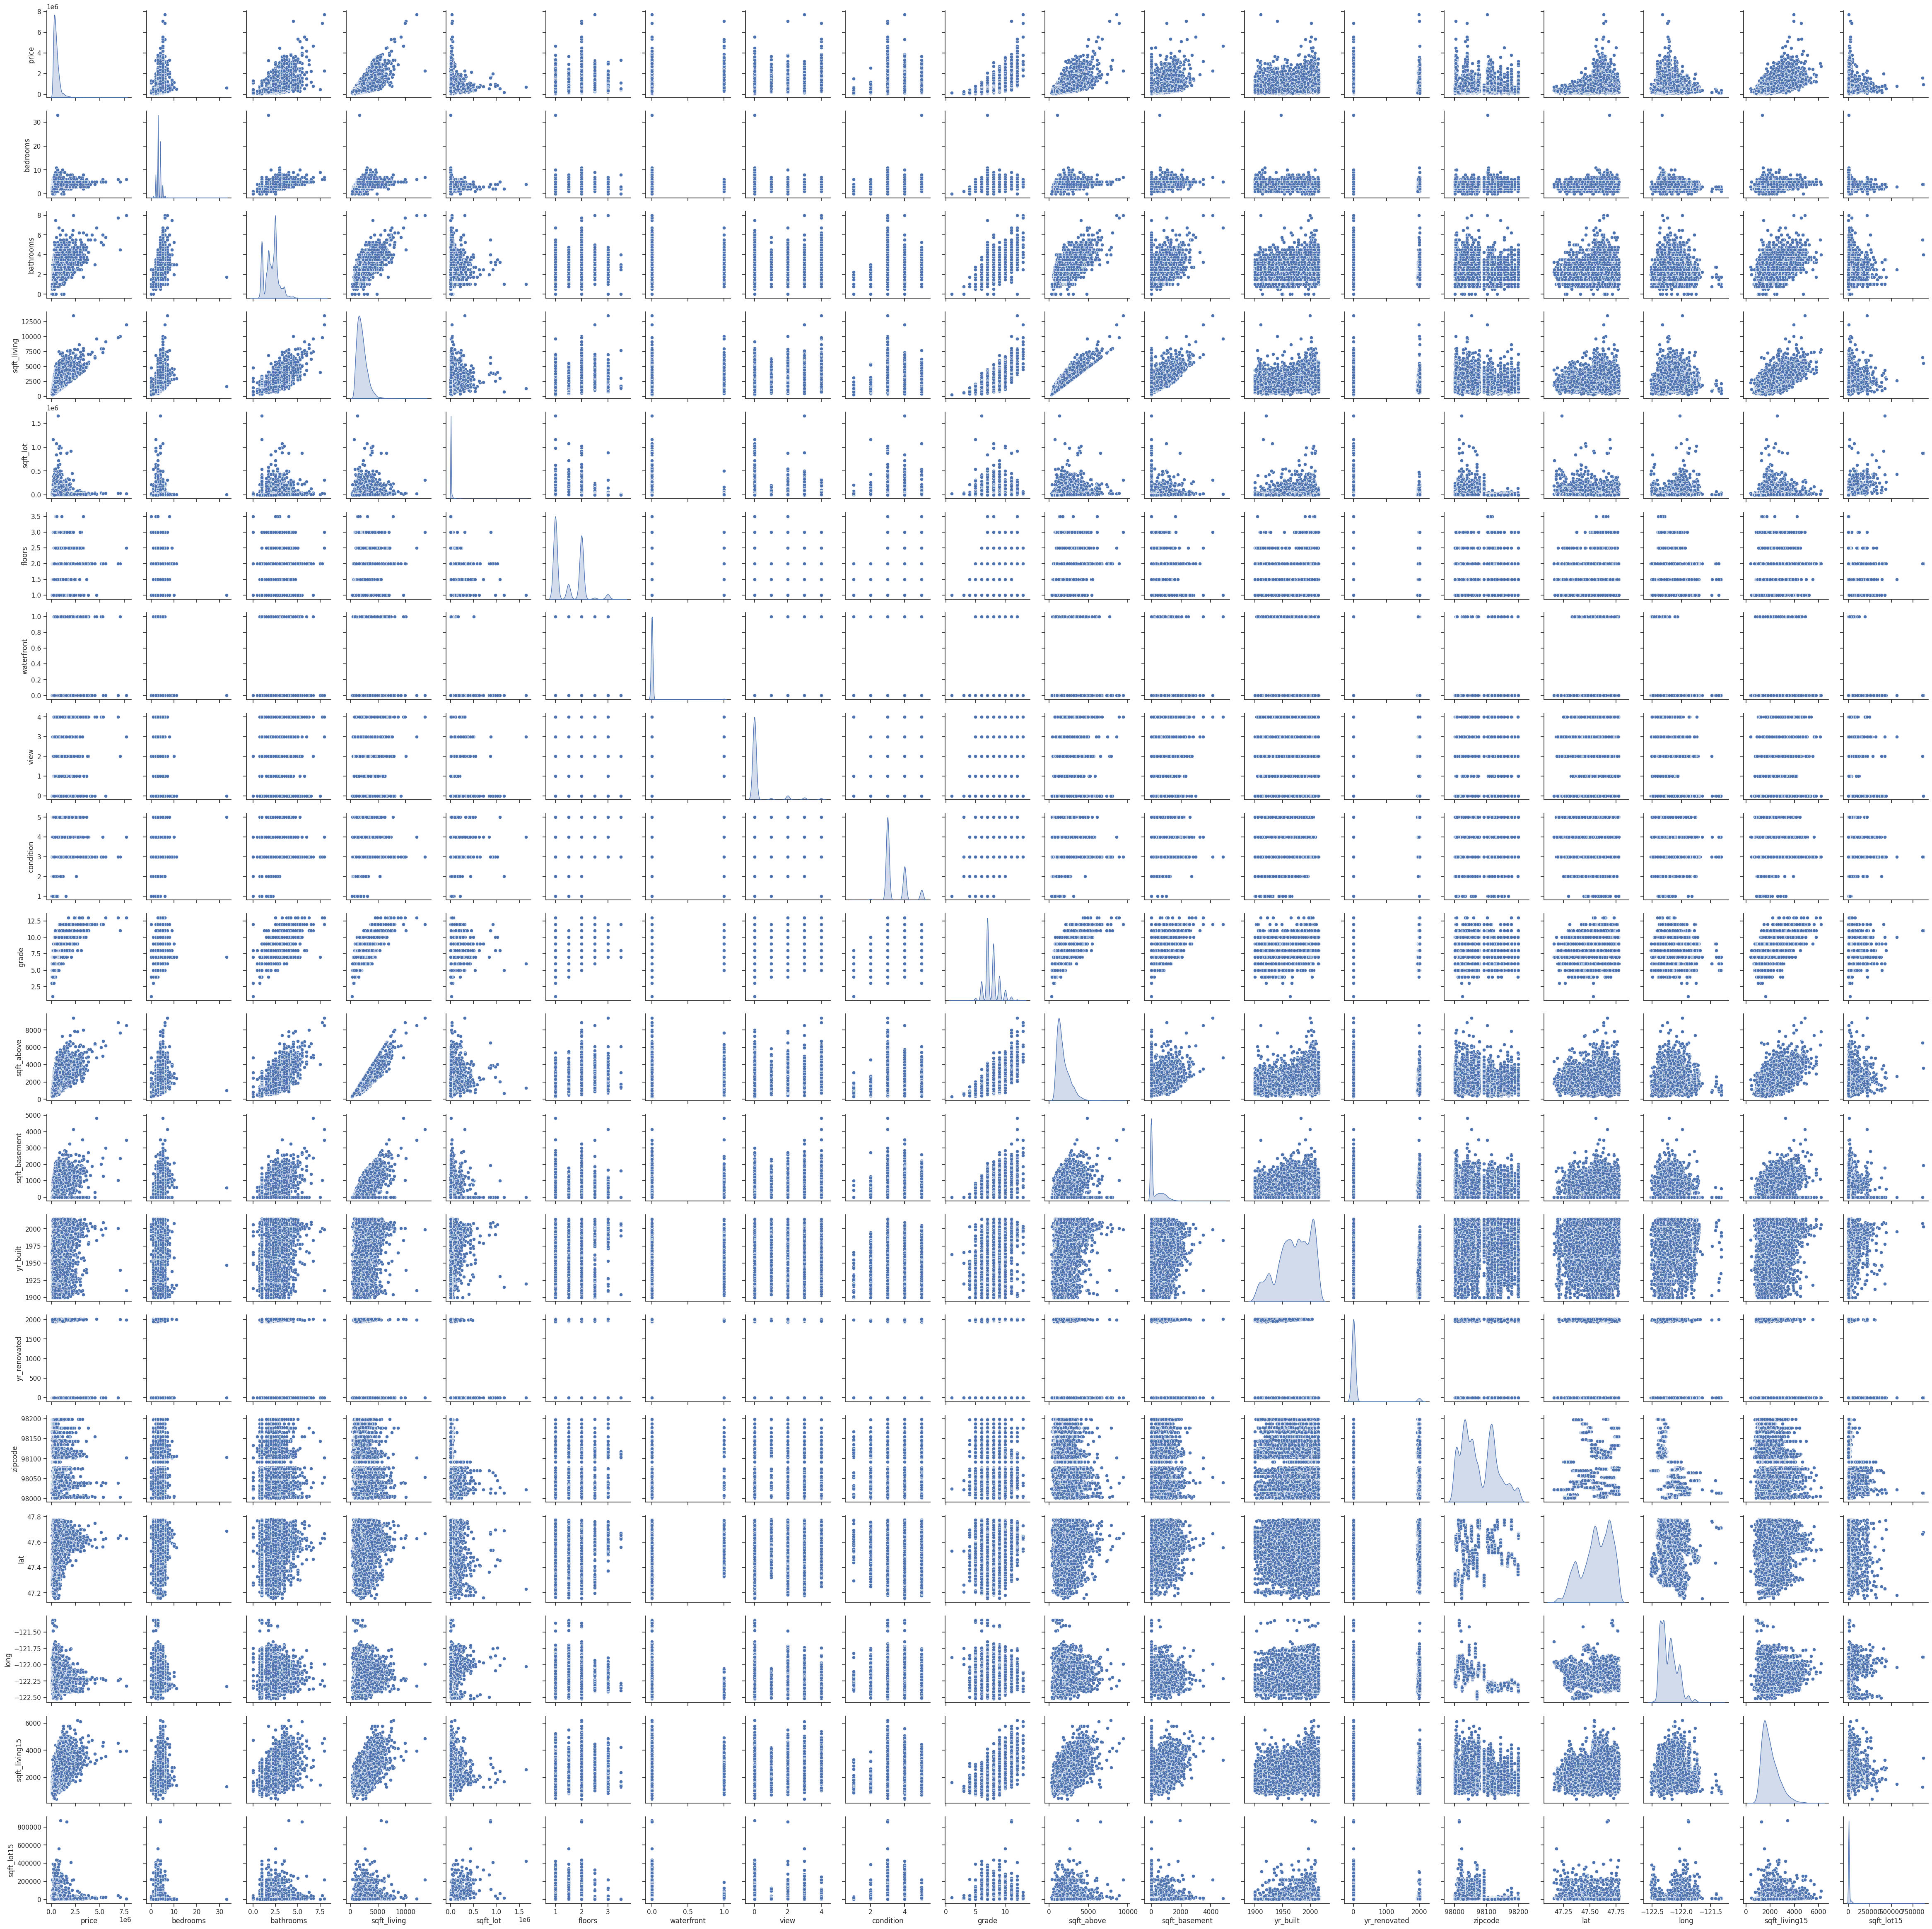

In [ ]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind='kde')
plt.show()

<ipython-input-6-4c0d90ef451e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


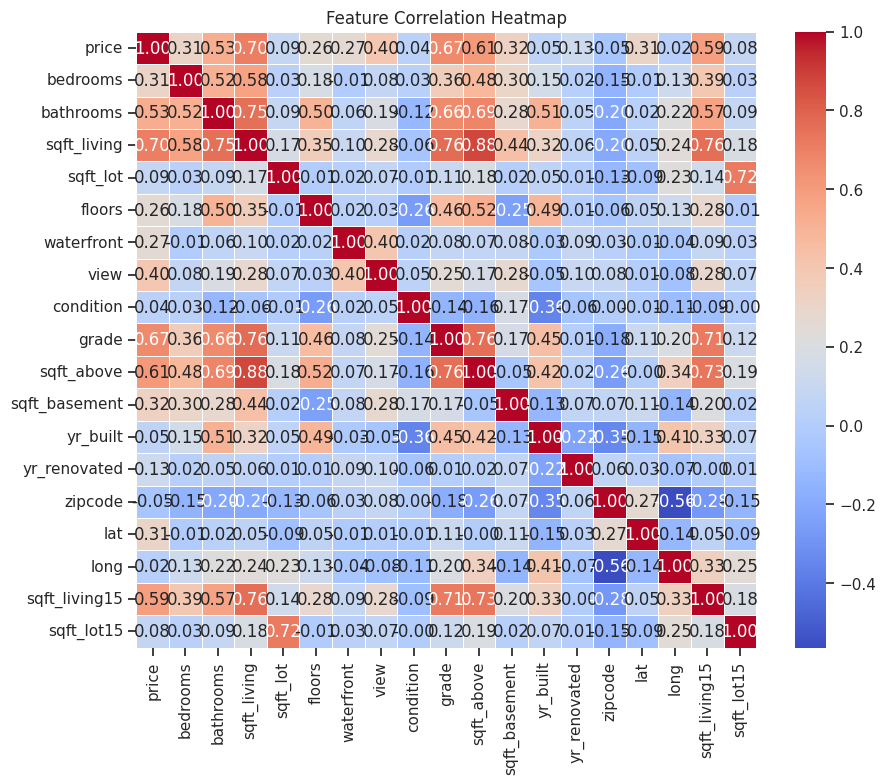

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
df = pd.DataFrame(data)
df['year'] = df['date'].apply(lambda x: x[:4])
df.date.unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [ ]:
df = df.drop("date", axis=1)


In [ ]:
df['year'] = df['year'].astype(int)
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
day                int64
dtype: object

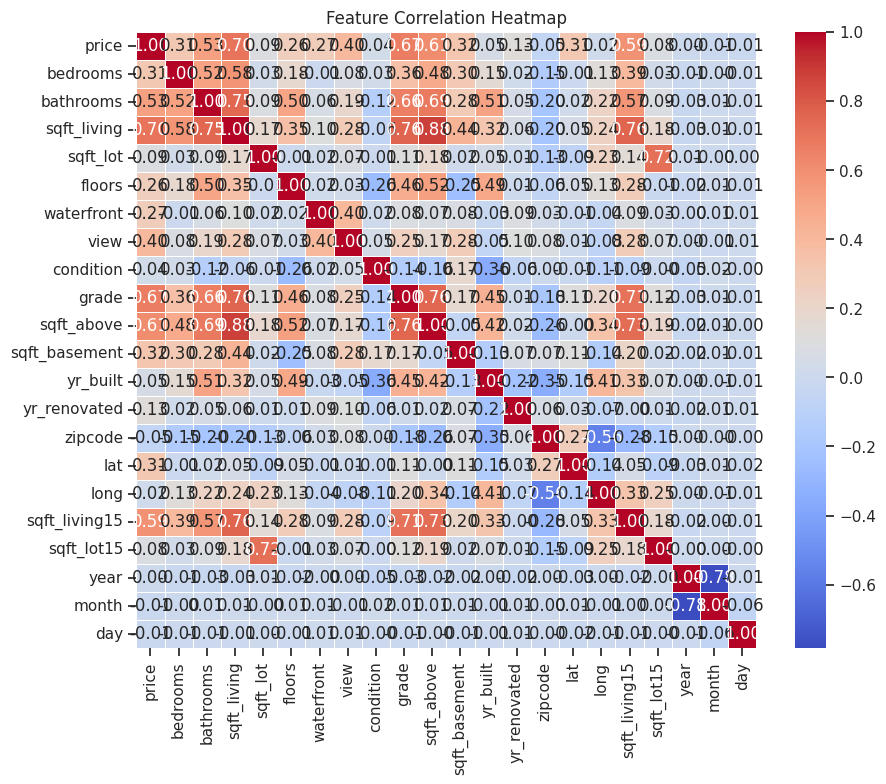

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:

y= df['price']
X = df.drop(['price'], axis=1)
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode  \
0              3      7        1180  ...      1955             0    98178   
1              3      7        2170  ...      1951          1991    98125   
2              3      6         770  ...      1933             0    98028   
3              5      7        1050  ...      1965             0    98136   
4              3      8        1680  ...      1987             0    98074   
...          ...    ...         ...  ...       ...           ...      ...   
21608          3      8        1530  ...      2009             0    98103   
21609          3      8        2310  ...      2014             0    98146   
21610          3      7        1020  ...      2009             0    98144   
21611          3      8        1600  ...      2004             0    98027   
21612          3      7        1020  ...      2008             0    98144   

           lat     long  sqft_living15  sqft_lot15  year  month  day  
0      47.5112 -122.257           1340        5650  2014     10   13  
1      47.7210 -122.319           1690        7639  2014     12    9  
2      47.7379 -122.233           2720        8062  2015      2   25  
3      47.5208 -122.393           1360        5000  2014     12    9  
4      47.6168 -122.045           1800        7503  2015      2   18  
...        ...      ...            ...         ...   ...    ...  ...  
21608  47.6993 -122.346           1530        1509  2014      5   21  
21609  47.5107 -122.362           1830        7200  2015      2   23  
21610  47.5944 -122.299           1020        2007  2014      6   23  
21611  47.5345 -122.069           1410        1287  2015      1   16  
21612  47.5941 -122.299           1020        1357  2014     10   15  

[21613 rows x 21 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)


svm_predicted_price = svm_regressor.predict(X_test)


dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)


dt_predicted_price = dt_regressor.predict(X_test)


rf_regressor = RandomForestRegressor(n_estimators=200, random_state=0)
rf_regressor.fit(X_train, y_train)


rf_predicted_price = rf_regressor.predict(X_test)


lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)


lr_predicted_price = lr_regressor.predict(X_test)

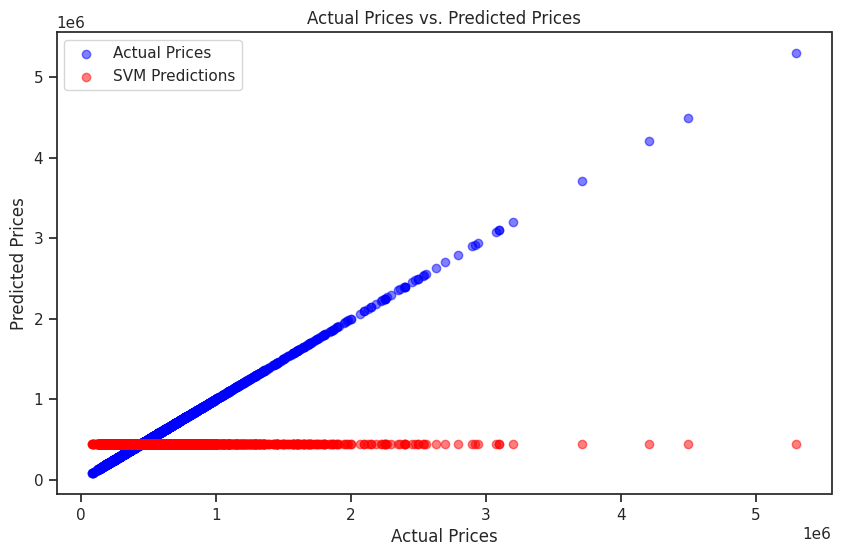

In [ ]:

plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)


plt.scatter(y_test, svm_predicted_price, color='red', label='SVM Predictions', alpha=0.5)



plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

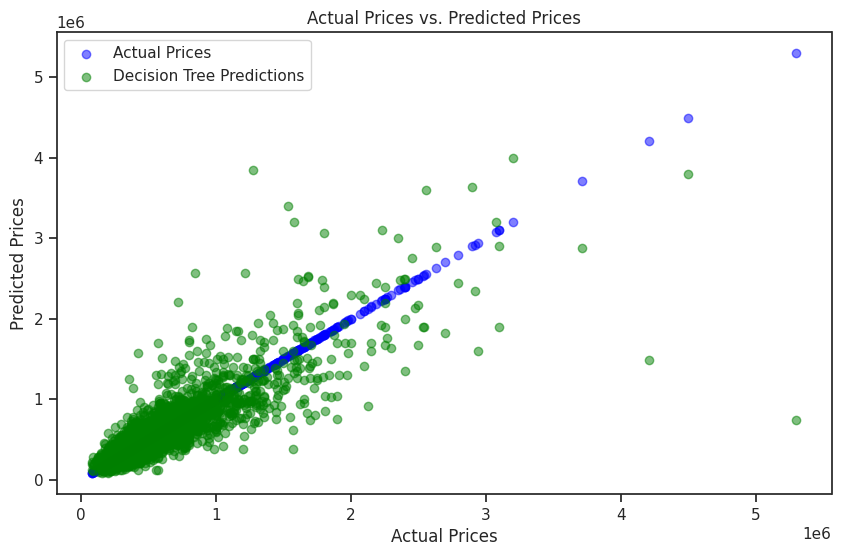

In [ ]:

plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)

plt.scatter(y_test, dt_predicted_price, color='green', label='Decision Tree Predictions', alpha=0.5)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

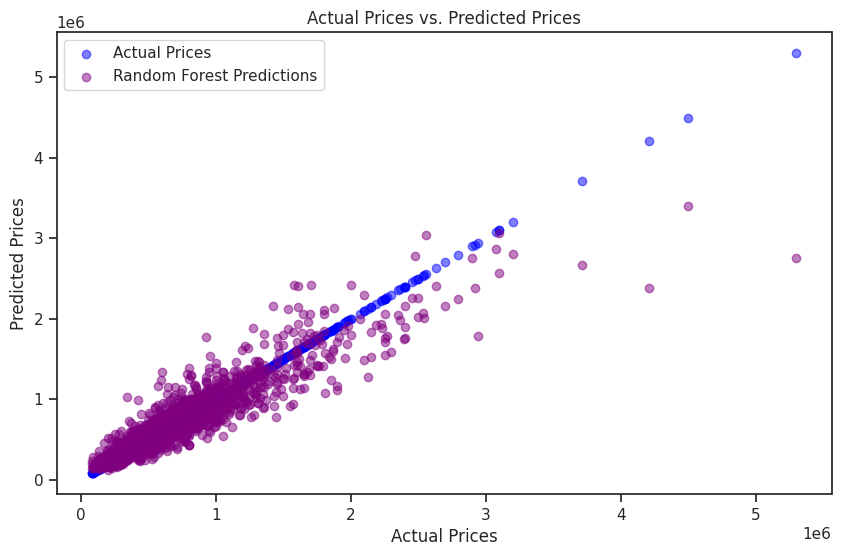

In [ ]:

plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)

plt.scatter(y_test, rf_predicted_price, color='purple', label='Random Forest Predictions', alpha=0.5)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

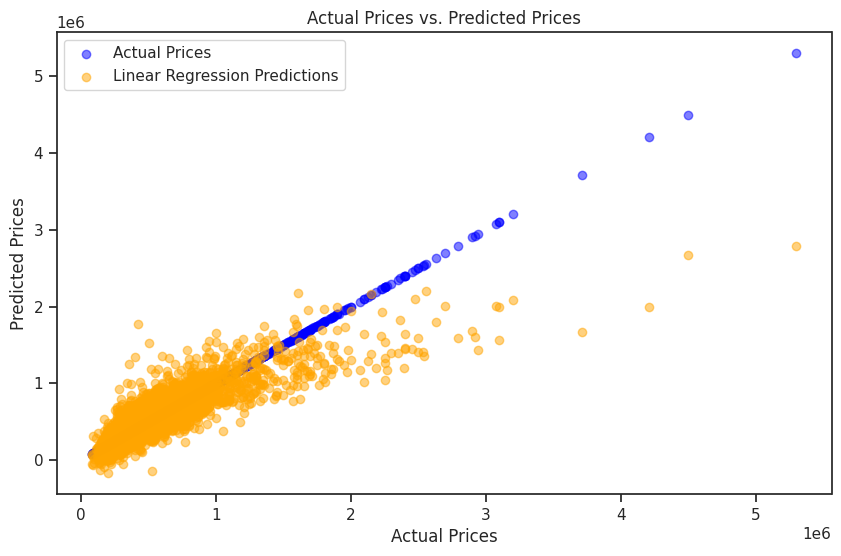

In [ ]:

plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)

plt.scatter(y_test, lr_predicted_price, color='orange', label='Linear Regression Predictions', alpha=0.5)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

In [ ]:
svm_mse = mean_squared_error(y_test, svm_predicted_price)

dt_mse = mean_squared_error(y_test, dt_predicted_price)

rf_mse = mean_squared_error(y_test, rf_predicted_price)

lr_mse = mean_squared_error(y_test, lr_predicted_price)
print('SVM Mean Squared Error:', svm_mse)


print('Decision Tree Mean Squared Error:', dt_mse)


print('Random Forest Mean Squared Error:', rf_mse)


print('Linear Regression Mean Squared Error:', lr_mse)

SVM Mean Squared Error: 142476682342.56592
Decision Tree Mean Squared Error: 39959803368.26145
Random Forest Mean Squared Error: 16507083924.662228
Linear Regression Mean Squared Error: 38992020589.10204


In [ ]:
# Create a dictionary to store MAE for each model
mae_metrics = {
    'SVM': svm_mse,
    'Decision Tree': dt_mse,
    'Random Forest': rf_mse,
    'Linear Regression': lr_mse
}

# Determine the model with the lowest MAE
best_model_mae = min(mae_metrics, key=lambda model: mae_metrics[model])

print(f'The best model based on MAE is: {best_model_mae}')


The best model based on MAE is: Random Forest
